<a href="https://colab.research.google.com/github/ukamedodi/mscfinalproject/blob/main/detect_roadsigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount drive
# files will be accessed from here
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# check for files present in folder
# you can skip
!ls gdrive/MyDrive/road-signs-v1/

data.yaml  detect-roadsigns.ipynb  images  labels  runs


In [ ]:
# path of model files. results will be copied here. make sure you run
ROOT_DIR = 'gdrive/MyDrive/road-signs-v1'

In [ ]:
# install ultralytics to load YOLO
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
!pip install torch torchvision

In [ ]:
!cat 'gdrive/MyDrive/road-signs-v1/data.yaml'

path: '/content/gdrive/MyDrive/road-signs-v1'
train: '/content/gdrive/MyDrive/road-signs-v1/images/train'
val: '/content/gdrive/MyDrive/road-signs-v1/images/valid'

# Classes
names:
  0: Barrier Ahead
  1: Cattle
  2: Caution
  3: Cycle Crossing
  4: Dangerous Dip
  5: Eating Place
  6: Falling Rocks
  7: Ferry
  8: First Aid Post
  9: Give Way
  10: Horn Prohibited
  11: Hospital
  12: Hump
  13: Left Hair Pin Bend
  14: Left Reverse Bend
  15: Left hand curve
  16: Light Refreshment
  17: Men at Work
  18: Narrow Bridge
  19: Narrow road ahead
  20: No Parking
  21: No Stopping
  22: No Thorough Road
  23: No Thorough SideRoad
  24: Parking Lot Cars
  25: Parking Lot Cycle
  26: Parking Lot Scooter and MotorCycle
  27: Parking This side
  28: Pedestrian Crossing
  29: Pedestrian Prohibited
  30: Petrol Pump- Gas Station
  31: Public Telephone
  32: Resting Place
  33: Right Hair Pin Bend
  34: Right Hand Curve
  35: Right Reverse Bend
  36: Road Wideness Ahead
  37: Round About
  38:

In [ ]:
# train the model
import os

from ultralytics import YOLO

model = YOLO("yolov8n.yaml")

results = model.train(data=os.path.join(ROOT_DIR,"data.yaml"),epochs=110)

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=gdrive/MyDrive/road-signs-v1/data.yaml, epochs=110, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 4.83MB/s]


Overriding model.yaml nc=80 with nc=73

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 25.0MB/s]


AMP: checks passed ✅


train: Scanning /content/gdrive/MyDrive/road-signs-v1/labels/train.cache... 6528 images, 46 backgrounds, 0 corrupt: 100%|██████████| 6547/6547 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/gdrive/MyDrive/road-signs-v1/labels/valid.cache... 725 images, 3 backgrounds, 0 corrupt: 100%|██████████| 725/725 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 110 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/110      2.49G      3.054      5.661       4.18          7        640: 100%|██████████| 410/410 [04:08<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:28<00:00,  1.25s/it]

                   all        725        745   0.000191    0.00743     0.0002   2.95e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/110       2.5G      2.633      5.319      3.537          8        640: 100%|██████████| 410/410 [01:10<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.39it/s]


                   all        725        745       0.54     0.0127    0.00632    0.00201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/110      2.51G      1.776      4.368      2.465          9        640: 100%|██████████| 410/410 [01:10<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.34it/s]


                   all        725        745      0.481     0.0898     0.0605     0.0282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/110      2.45G      1.449      3.759      2.017          5        640: 100%|██████████| 410/410 [01:09<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.49it/s]


                   all        725        745       0.35      0.252      0.145     0.0772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/110      2.46G      1.329      3.365      1.841          7        640: 100%|██████████| 410/410 [01:09<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.65it/s]


                   all        725        745      0.387      0.278       0.18      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/110      2.45G      1.269      3.008      1.744          9        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.57it/s]


                   all        725        745      0.427      0.292      0.206      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/110      2.46G      1.227      2.736      1.682          5        640: 100%|██████████| 410/410 [01:09<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.49it/s]


                   all        725        745        0.4      0.369        0.3      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/110      2.45G      1.199       2.55      1.646          8        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.59it/s]


                   all        725        745      0.471      0.383      0.362      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/110      2.46G       1.18       2.43      1.629          8        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.62it/s]


                   all        725        745       0.49      0.453      0.393      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/110      2.45G      1.161      2.305      1.606          4        640: 100%|██████████| 410/410 [01:09<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.58it/s]


                   all        725        745      0.531       0.46      0.478      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/110      2.46G       1.14      2.218      1.576          7        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.74it/s]


                   all        725        745      0.493      0.517      0.511       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/110      2.45G      1.128      2.145      1.569          5        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.78it/s]


                   all        725        745      0.591      0.448      0.558      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/110      2.46G      1.118      2.072      1.551          3        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.76it/s]


                   all        725        745      0.661      0.531      0.587       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/110      2.45G      1.096      2.002      1.535          9        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.75it/s]


                   all        725        745      0.646      0.525      0.606      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/110      2.46G      1.098      1.965      1.532          8        640: 100%|██████████| 410/410 [01:09<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.81it/s]


                   all        725        745      0.576      0.608      0.643      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/110      2.45G      1.089      1.884      1.518          5        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.56it/s]


                   all        725        745      0.663      0.598      0.649       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/110      2.46G      1.084       1.85      1.512          8        640: 100%|██████████| 410/410 [01:09<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.52it/s]


                   all        725        745      0.742      0.568      0.677      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/110      2.45G      1.061      1.801      1.488          7        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.53it/s]


                   all        725        745      0.642       0.66      0.692      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/110      2.46G      1.066      1.772      1.488          5        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.61it/s]


                   all        725        745       0.68      0.614      0.704      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/110      2.45G      1.052      1.745      1.484          8        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.62it/s]


                   all        725        745      0.723      0.605      0.721      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/110      2.46G      1.037      1.706      1.475         10        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.53it/s]


                   all        725        745      0.691      0.639      0.722      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/110      2.45G      1.034      1.675      1.469          7        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.60it/s]


                   all        725        745      0.661      0.672      0.737       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/110      2.46G      1.036      1.647       1.46          7        640: 100%|██████████| 410/410 [01:09<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.59it/s]


                   all        725        745      0.759      0.626      0.743      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/110      2.45G      1.023       1.62      1.453          9        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.62it/s]


                   all        725        745      0.675       0.64      0.724      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/110      2.46G      1.013       1.59      1.442          4        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.68it/s]


                   all        725        745      0.644      0.712      0.758        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/110      2.45G       1.02       1.57      1.449          3        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.64it/s]


                   all        725        745      0.733      0.653      0.763      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/110      2.46G      1.005      1.554      1.437          9        640: 100%|██████████| 410/410 [01:09<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.73it/s]


                   all        725        745      0.728      0.627      0.735      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/110      2.45G     0.9983      1.527      1.429          9        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.81it/s]


                   all        725        745      0.676      0.721      0.753      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/110      2.46G      1.003      1.515      1.433          8        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.81it/s]


                   all        725        745       0.64      0.734       0.76      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/110      2.45G     0.9838      1.497      1.421          7        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.72it/s]


                   all        725        745      0.706      0.717      0.782      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/110      2.46G     0.9777      1.456      1.416         11        640: 100%|██████████| 410/410 [01:09<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.66it/s]


                   all        725        745      0.775      0.659      0.775      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/110      2.45G     0.9788      1.463      1.411          6        640: 100%|██████████| 410/410 [01:09<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.76it/s]


                   all        725        745      0.665      0.748      0.786      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/110      2.46G     0.9721      1.446      1.409          7        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.75it/s]


                   all        725        745      0.654      0.738      0.781      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/110      2.45G     0.9668      1.442      1.404          6        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.73it/s]


                   all        725        745      0.741      0.675      0.753      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/110      2.46G     0.9622      1.416      1.402          5        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.67it/s]


                   all        725        745      0.707       0.71      0.777      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/110      2.45G     0.9573      1.396      1.397          6        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.59it/s]


                   all        725        745       0.77      0.695      0.801      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/110      2.46G     0.9487      1.386      1.389          9        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.64it/s]


                   all        725        745      0.719      0.731      0.798      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/110      2.45G     0.9462      1.362      1.387          5        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.72it/s]


                   all        725        745      0.762      0.707      0.801      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/110      2.46G     0.9512       1.36      1.386          7        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.62it/s]


                   all        725        745      0.702      0.767      0.813      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/110      2.47G     0.9425      1.354      1.374          8        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.63it/s]


                   all        725        745      0.726      0.708      0.791      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/110      2.46G     0.9363      1.342      1.371          6        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.60it/s]


                   all        725        745      0.726      0.738      0.812       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/110      2.45G      0.927      1.307      1.365          5        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.70it/s]


                   all        725        745      0.758       0.75      0.808      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/110      2.46G     0.9329      1.318      1.371          4        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.85it/s]


                   all        725        745      0.717      0.731      0.801       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/110      2.45G      0.925      1.304      1.364          7        640: 100%|██████████| 410/410 [01:09<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.77it/s]


                   all        725        745      0.753      0.757      0.828      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/110      2.46G      0.923      1.284      1.363          3        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.85it/s]


                   all        725        745      0.769      0.725      0.814      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/110      2.45G     0.9207      1.282      1.359          8        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.67it/s]


                   all        725        745      0.729      0.782      0.823      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/110      2.46G     0.9123      1.255      1.352          8        640: 100%|██████████| 410/410 [01:09<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.85it/s]


                   all        725        745      0.748      0.739      0.822      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/110      2.45G     0.9107      1.244      1.347          4        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.73it/s]


                   all        725        745      0.767      0.782      0.829      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/110      2.46G     0.9084      1.248       1.35          3        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.68it/s]


                   all        725        745      0.689      0.826      0.832      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/110      2.45G     0.9007      1.244      1.347         10        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.57it/s]


                   all        725        745      0.764      0.739      0.812      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/110      2.46G        0.9      1.232      1.341         10        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.74it/s]


                   all        725        745      0.755      0.768      0.825      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/110      2.45G     0.8912      1.224      1.337          7        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.78it/s]


                   all        725        745      0.796      0.733      0.824       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/110      2.46G      0.896       1.21      1.334          9        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.60it/s]


                   all        725        745      0.779      0.752      0.828      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/110      2.45G     0.8868      1.222      1.332         11        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.61it/s]


                   all        725        745      0.765      0.753      0.827      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/110      2.46G     0.8747      1.183      1.319          6        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.84it/s]


                   all        725        745      0.736      0.807      0.833      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/110      2.45G     0.8771      1.184      1.324          9        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.67it/s]


                   all        725        745      0.769      0.759      0.832      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/110      2.48G     0.8717      1.171      1.324          8        640: 100%|██████████| 410/410 [01:09<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.86it/s]


                   all        725        745      0.728      0.805      0.832      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/110      2.45G     0.8635      1.162      1.314         11        640: 100%|██████████| 410/410 [01:09<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.84it/s]


                   all        725        745      0.796      0.744      0.822      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/110      2.46G     0.8641      1.161      1.317          6        640: 100%|██████████| 410/410 [01:09<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.76it/s]


                   all        725        745      0.786      0.771      0.831      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/110      2.45G     0.8641      1.138      1.311          4        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.76it/s]


                   all        725        745       0.78      0.776      0.836      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/110      2.46G      0.863      1.133      1.309          7        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.79it/s]


                   all        725        745      0.809      0.743      0.837      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/110      2.45G     0.8557      1.133      1.305          7        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.79it/s]


                   all        725        745      0.792      0.768       0.83       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/110       2.5G     0.8609      1.134      1.307          7        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.80it/s]

                   all        725        745      0.809       0.76      0.838      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/110      2.45G     0.8492      1.119        1.3          5        640: 100%|██████████| 410/410 [01:08<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.72it/s]


                   all        725        745      0.819       0.74      0.834       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/110      2.46G     0.8486      1.115      1.299          6        640: 100%|██████████| 410/410 [01:08<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.79it/s]


                   all        725        745      0.802      0.774      0.834      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/110      2.45G     0.8522      1.104      1.298          4        640: 100%|██████████| 410/410 [01:08<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.77it/s]


                   all        725        745      0.816      0.768      0.836      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/110      2.46G     0.8426       1.11      1.297         12        640: 100%|██████████| 410/410 [01:08<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.71it/s]


                   all        725        745      0.814      0.772      0.849       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/110      2.45G     0.8373      1.097      1.289         12        640: 100%|██████████| 410/410 [01:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.77it/s]


                   all        725        745      0.789      0.778      0.841      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/110      2.46G     0.8374      1.088      1.289          7        640: 100%|██████████| 410/410 [01:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.77it/s]


                   all        725        745      0.804      0.782      0.837      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/110      2.45G      0.829      1.057      1.289          8        640: 100%|██████████| 410/410 [01:08<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.82it/s]


                   all        725        745      0.822      0.768      0.838       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/110      2.46G     0.8302      1.064      1.285          7        640: 100%|██████████| 410/410 [01:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.85it/s]


                   all        725        745      0.778      0.766      0.836      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/110      2.45G     0.8285      1.061      1.287          6        640: 100%|██████████| 410/410 [01:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.93it/s]


                   all        725        745      0.838       0.76      0.843      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/110      2.46G     0.8265      1.049      1.284          6        640: 100%|██████████| 410/410 [01:08<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.83it/s]


                   all        725        745      0.836      0.762      0.831       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/110      2.45G     0.8214      1.053      1.283          6        640: 100%|██████████| 410/410 [01:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.93it/s]


                   all        725        745       0.81      0.762      0.829      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/110      2.46G     0.8162       1.04      1.277          7        640: 100%|██████████| 410/410 [01:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.86it/s]


                   all        725        745      0.819      0.766      0.835      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/110      2.45G     0.8139      1.035      1.277          5        640: 100%|██████████| 410/410 [01:08<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.87it/s]


                   all        725        745      0.799      0.774      0.839      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/110      2.46G     0.8123      1.031      1.273          5        640: 100%|██████████| 410/410 [01:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.97it/s]


                   all        725        745      0.839      0.764      0.839      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/110      2.45G     0.8117      1.031      1.274          4        640: 100%|██████████| 410/410 [01:08<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.83it/s]


                   all        725        745      0.818      0.774      0.836       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/110      2.46G     0.8093       1.03      1.269          5        640: 100%|██████████| 410/410 [01:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.73it/s]

                   all        725        745      0.836      0.764       0.84      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/110      2.45G     0.7997      1.008      1.269         10        640: 100%|██████████| 410/410 [01:08<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.81it/s]


                   all        725        745      0.832      0.774      0.837      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/110      2.46G     0.7969      1.006      1.264         10        640: 100%|██████████| 410/410 [01:08<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.85it/s]


                   all        725        745      0.806      0.789       0.84      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/110      2.45G     0.7948     0.9982      1.262          9        640: 100%|██████████| 410/410 [01:08<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.79it/s]


                   all        725        745      0.779      0.786       0.84      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/110      2.46G     0.7939     0.9984       1.26          5        640: 100%|██████████| 410/410 [01:08<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.76it/s]


                   all        725        745      0.831      0.759      0.845      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/110      2.45G     0.7927     0.9921       1.26          5        640: 100%|██████████| 410/410 [01:08<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.81it/s]


                   all        725        745      0.825      0.777      0.842      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/110      2.46G      0.787     0.9866      1.249          7        640: 100%|██████████| 410/410 [01:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.81it/s]


                   all        725        745      0.836       0.77      0.847      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/110      2.45G     0.7762     0.9709      1.252          8        640: 100%|██████████| 410/410 [01:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.86it/s]


                   all        725        745      0.848      0.768      0.846      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/110      2.46G     0.7882     0.9728      1.255         12        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.69it/s]


                   all        725        745      0.794      0.794      0.846      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/110      2.45G     0.7796     0.9654      1.249          9        640: 100%|██████████| 410/410 [01:09<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.84it/s]


                   all        725        745      0.857      0.756      0.843      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/110      2.46G     0.7694      0.947      1.246          8        640: 100%|██████████| 410/410 [01:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.95it/s]


                   all        725        745      0.855      0.762      0.842      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/110      2.45G     0.7661     0.9361       1.24          6        640: 100%|██████████| 410/410 [01:08<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.82it/s]


                   all        725        745      0.806      0.785      0.842      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/110      2.46G      0.768     0.9512      1.239          9        640: 100%|██████████| 410/410 [01:09<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.81it/s]


                   all        725        745      0.862      0.748      0.842      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/110      2.45G     0.7654     0.9358      1.241         11        640: 100%|██████████| 410/410 [01:09<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.80it/s]


                   all        725        745      0.863      0.754      0.846      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/110      2.46G     0.7601     0.9266       1.24          4        640: 100%|██████████| 410/410 [01:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.72it/s]


                   all        725        745      0.825      0.792      0.848      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/110      2.45G     0.7602     0.9221      1.238          9        640: 100%|██████████| 410/410 [01:09<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.59it/s]


                   all        725        745      0.816      0.796      0.845      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/110      2.46G     0.7533     0.9259      1.232          7        640: 100%|██████████| 410/410 [01:09<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.71it/s]


                   all        725        745      0.854      0.766      0.849      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/110      2.45G     0.7452     0.9047      1.229          5        640: 100%|██████████| 410/410 [01:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.79it/s]


                   all        725        745      0.809      0.798      0.847      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/110      2.46G     0.7563     0.9163      1.233          9        640: 100%|██████████| 410/410 [01:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.73it/s]


                   all        725        745      0.813       0.79      0.843      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/110      2.45G     0.7413     0.9015      1.225          4        640: 100%|██████████| 410/410 [01:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.76it/s]


                   all        725        745      0.827      0.779      0.846       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/110      2.46G      0.746     0.9131      1.229          8        640: 100%|██████████| 410/410 [01:09<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.80it/s]


                   all        725        745      0.832      0.771      0.843      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/110      2.45G      0.742     0.9069      1.225          8        640: 100%|██████████| 410/410 [01:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.88it/s]


                   all        725        745      0.835      0.767      0.843      0.582
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/110       2.5G      0.636      0.487      1.261          3        640: 100%|██████████| 410/410 [01:10<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.76it/s]


                   all        725        745      0.833      0.771      0.843       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/110      2.45G     0.6181     0.4641      1.254          3        640: 100%|██████████| 410/410 [01:08<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.87it/s]


                   all        725        745      0.845      0.765      0.844      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/110      2.46G     0.6049     0.4569      1.231          3        640: 100%|██████████| 410/410 [01:08<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.80it/s]


                   all        725        745      0.824      0.789      0.843      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/110      2.45G     0.5925     0.4458      1.217          5        640: 100%|██████████| 410/410 [01:08<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.85it/s]

                   all        725        745      0.831       0.78      0.845      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/110      2.46G     0.5922     0.4369      1.222          3        640: 100%|██████████| 410/410 [01:08<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.82it/s]


                   all        725        745      0.841      0.774      0.846      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/110      2.45G     0.5811     0.4333      1.212          5        640: 100%|██████████| 410/410 [01:08<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.87it/s]


                   all        725        745       0.86      0.764      0.846      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/110      2.46G     0.5733     0.4254      1.203          3        640: 100%|██████████| 410/410 [01:08<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.78it/s]


                   all        725        745      0.861      0.766      0.847       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/110      2.45G     0.5702       0.42        1.2          3        640: 100%|██████████| 410/410 [01:08<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.80it/s]


                   all        725        745      0.866      0.765      0.841      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/110      2.46G     0.5675      0.415      1.196          3        640: 100%|██████████| 410/410 [01:08<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.70it/s]


                   all        725        745      0.863      0.765      0.842      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/110      2.45G     0.5644     0.4127      1.197          3        640: 100%|██████████| 410/410 [01:08<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.75it/s]


                   all        725        745      0.862      0.765      0.841      0.582

110 epochs completed in 2.337 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3091487 parameters, 0 gradients, 8.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.80it/s]


                   all        725        745      0.859      0.767      0.846       0.59
         Barrier Ahead        725          1          0          0          0          0
                Cattle        725         15      0.965      0.933      0.978       0.86
               Caution        725          3      0.902      0.667      0.806      0.761
        Cycle Crossing        725          2       0.74        0.5      0.548      0.483
         Dangerous Dip        725         11      0.846          1      0.957      0.732
          Eating Place        725         23          1      0.735      0.941      0.594
         Falling Rocks        725          9          1      0.178      0.468      0.262
                 Ferry        725         16      0.871       0.75      0.946      0.579
        First Aid Post        725          2      0.458        0.5      0.606      0.385
              Give Way        725         13        0.8      0.923      0.888      0.535
       Horn Prohibite

In [ ]:
# validate model
# get the confidence score, will be displayed as array
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3091487 parameters, 0 gradients, 8.5 GFLOPs


val: Scanning /content/gdrive/MyDrive/road-signs-v1/labels/valid.cache... 725 images, 3 backgrounds, 0 corrupt: 100%|██████████| 725/725 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:10<00:00,  4.19it/s]


                   all        725        745      0.859      0.767      0.846      0.589
         Barrier Ahead        725          1          0          0          0          0
                Cattle        725         15      0.965      0.933      0.978      0.858
               Caution        725          3      0.902      0.667      0.806      0.761
        Cycle Crossing        725          2       0.74        0.5      0.548      0.483
         Dangerous Dip        725         11      0.846          1      0.957      0.732
          Eating Place        725         23          1      0.735      0.941      0.594
         Falling Rocks        725          9          1      0.178      0.468      0.262
                 Ferry        725         16      0.871       0.75      0.946      0.578
        First Aid Post        725          2      0.458        0.5      0.606      0.385
              Give Way        725         13      0.801      0.923      0.888      0.535
       Horn Prohibite

array([          0,     0.85777,     0.76051,     0.48322,     0.73174,     0.59404,     0.26179,     0.57849,     0.38493,     0.53531,     0.61853,     0.62802,     0.33177,     0.64461,       0.995,     0.34639,     0.68202,     0.43076,     0.78778,     0.42131,     0.75864,     0.44751,      0.5449,     0.35737,
            0.4975,     0.41511,      0.3554,     0.38548,     0.34868,      0.7242,      0.8955,     0.66082,     0.51577,     0.61302,     0.68887,     0.81356,     0.66519,     0.68834,     0.65759,     0.35508,     0.73055,     0.67245,       0.564,     0.54667,      0.5104,      0.7546,     0.31515,      0.4975,
            0.5794,     0.63598,     0.64707,     0.78001,     0.76494,     0.58949,     0.39796,     0.73618,     0.65288,     0.67096,     0.60347,     0.68812,     0.70802,    0.086172,     0.71396,     0.68797,       0.796,     0.70372,      0.6579,      0.7637,     0.81108,      0.7037,     0.53578,     0.47527,
           0.58949])

In [ ]:
import requests
from PIL import Image
from io import BytesIO

# Example usage
url = "https://media.istockphoto.com/id/165067961/vector/cautionary-series.jpg?s=612x612&w=0&k=20&c=dsqpnrVYljmOwxg7QjwV9rFY88hRja9S5Z5A4RNxTBM="  # Replace this URL with the one you want to download
response = requests.get(url)
if response.status_code == 200:
    image = Image.open(BytesIO(response.content))



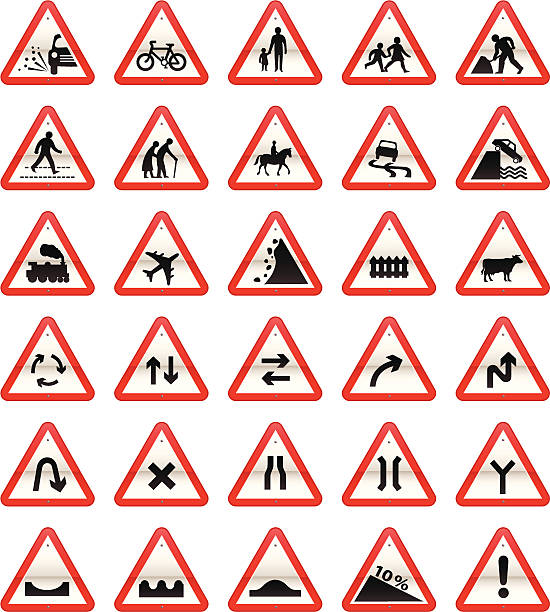

In [ ]:
image

In [ ]:
# Predict an image with the model
import numpy as np
results = model("/content/test"
,save=True, imgsz=320, conf=0.05)  # predict on an image


image 1/11 /content/test/BA-10-_jpg.rf.93bb0f99b2b53c5e8d18cbf422080f1e.jpg: 320x320 1 Cattle, 66.2ms
image 2/11 /content/test/BA-11-_png.rf.c599df13e10e86a867fd7294a8efc31c.jpg: 320x320 1 Cattle, 1 Steep Descent, 9.5ms
image 3/11 /content/test/BA-12-_jpg.rf.7fd6de94ec64cfdd5223398f36eb2af3.jpg: 320x320 1 Cattle, 1 Horn Prohibited, 8.9ms
image 4/11 /content/test/BA-13-_png.rf.0c4603ecf22b250d386d0f9dd8013107.jpg: 320x320 1 Cattle, 9.1ms
image 5/11 /content/test/BA-16-_png.rf.9bddbd9520bdffcf6422c3216d91e76c.jpg: 320x320 1 Cattle, 9.8ms
image 6/11 /content/test/BA-20-_png.rf.c418c6ff6c9adf26f71f9ac9c1944c76.jpg: 320x320 1 Cattle, 9.8ms
image 7/11 /content/test/BA-22-_png.rf.9e3309901788db99552a809120404b54.jpg: 320x320 1 Cattle, 8.9ms
image 8/11 /content/test/BA-24-_png.rf.0aa85e3a91eecacc6739e6ee94101259.jpg: 320x320 1 Cattle, 8.7ms
image 9/11 /content/test/BA-26-_png.rf.70a42e185fd7d22945f18bc6e7cfd1ef.jpg: 320x320 1 Cattle, 9.0ms
image 10/11 /content/test/BA-27-_png.rf.5a1b65f790eb2

In [ ]:
# predict a video
from google.colab import files
import cv2
from ultralytics import YOLO

# Upload the video file for testing
uploaded = files.upload()
video_path = list(uploaded.keys())[0]
results=model(video_path, conf=0.676,save=True)  # predict on an image

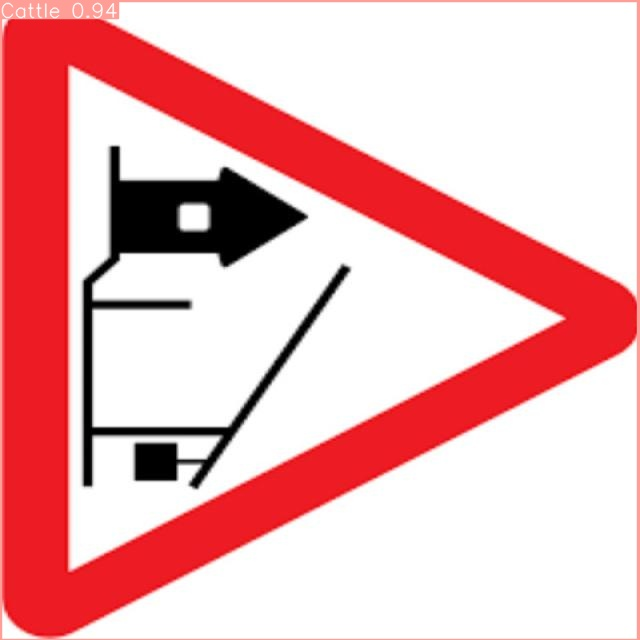

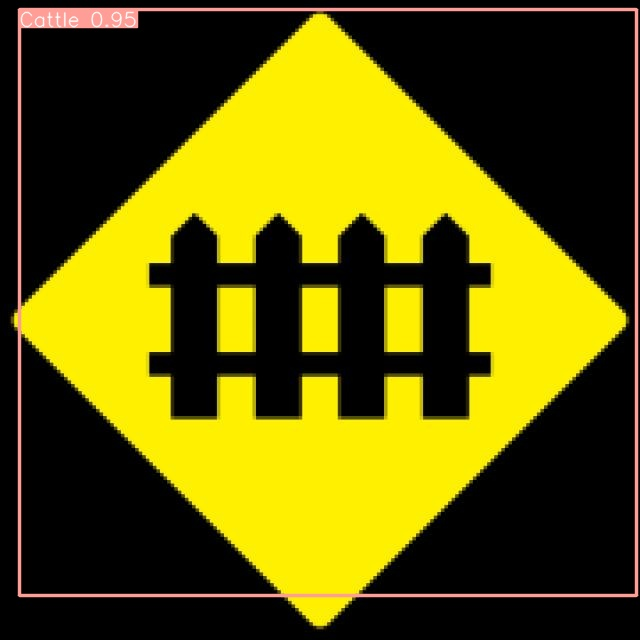

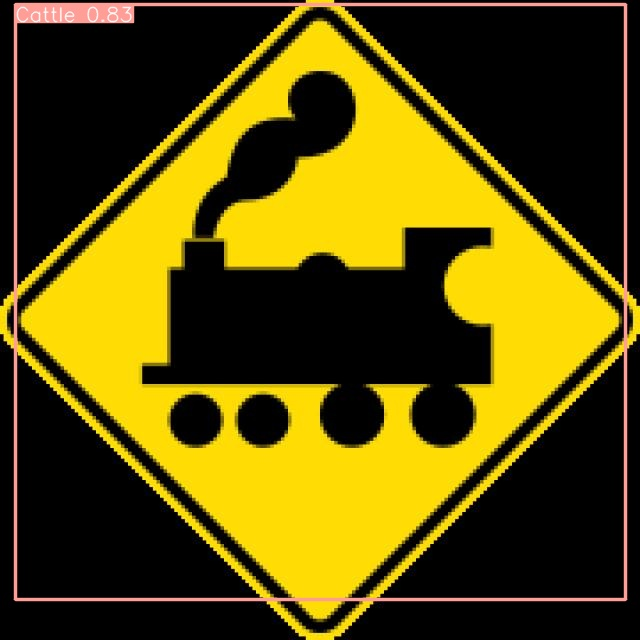

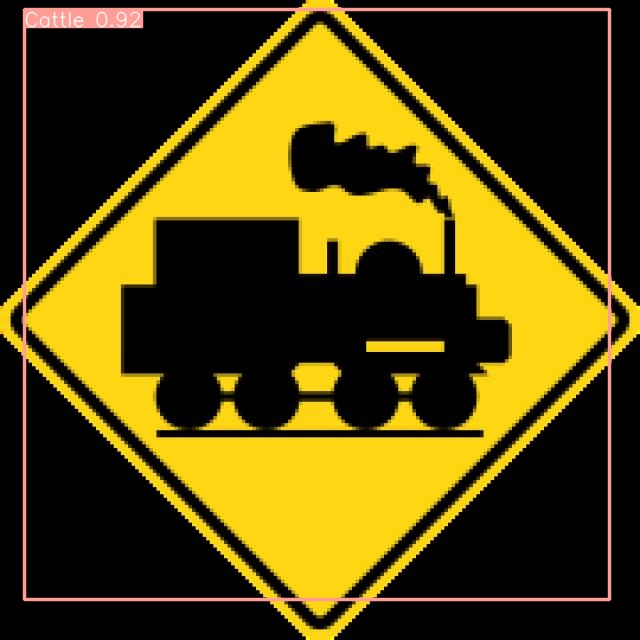

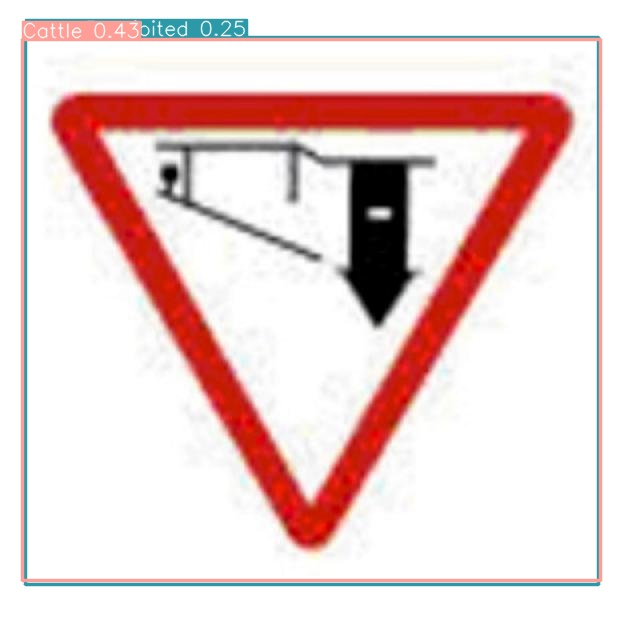

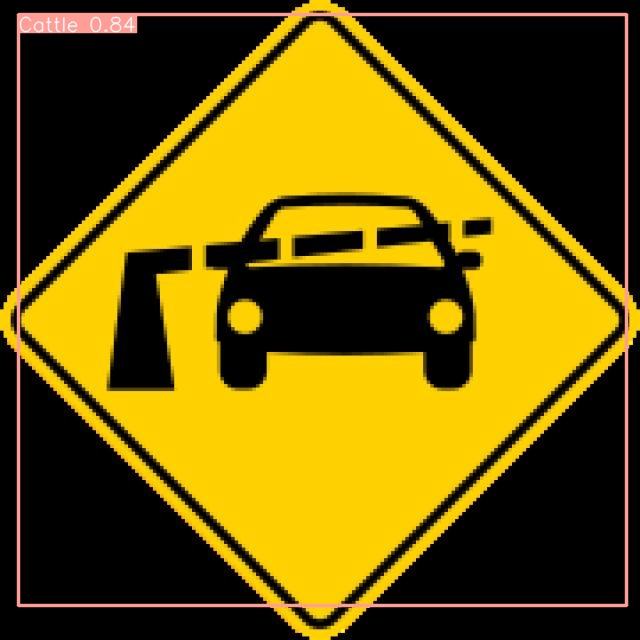

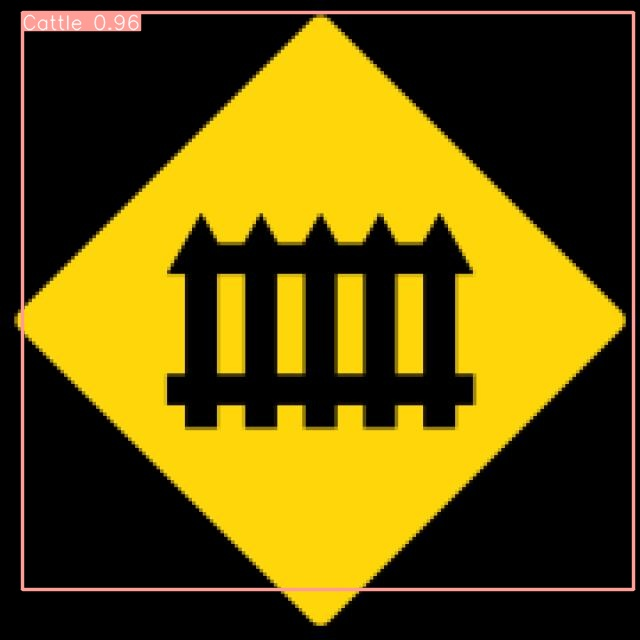

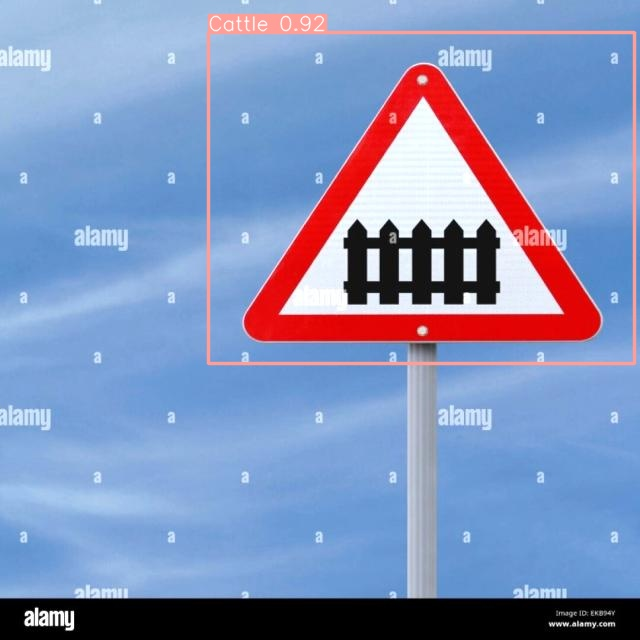

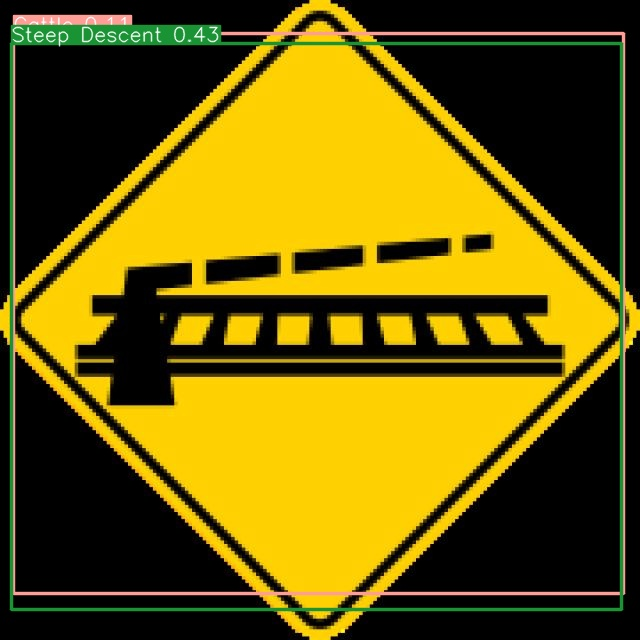

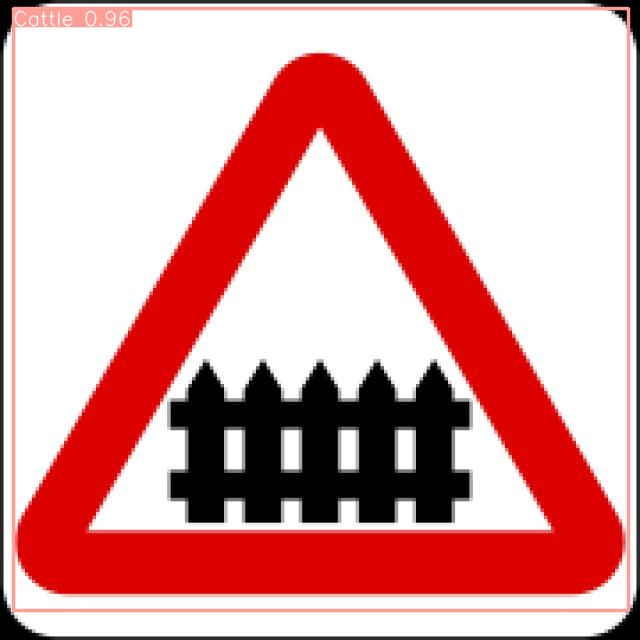

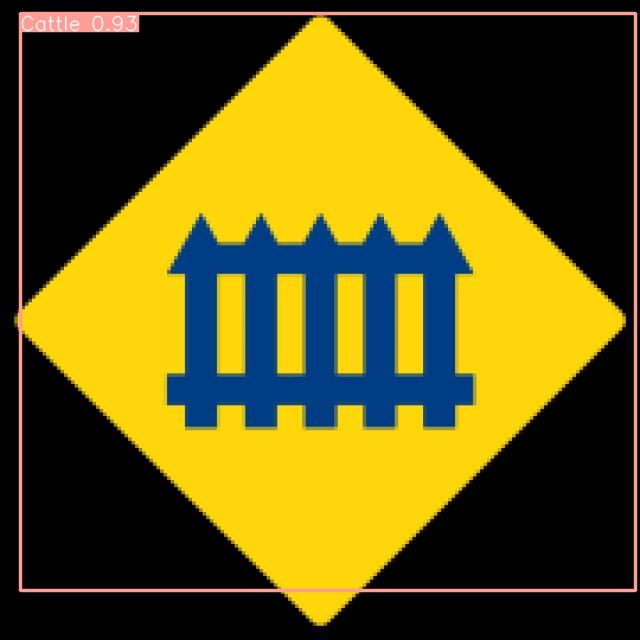

In [ ]:
import glob
for i in glob.glob("/content/runs/detect/train9/*"):
  display(Image.open(i))